In [1]:
import tarfile
import os

import matplotlib.pyplot as plt
import numpy as np
import skimage.io

from scipy import ndimage as ndi

In [2]:
# Load image
data_path = os.path.join('./operators/')
operators = skimage.io.imread(os.path.join(data_path, 'original_operators.png'))

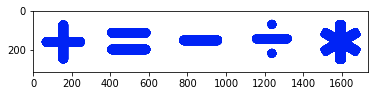

In [3]:
plt.imshow(operators,cmap='gray')

In [4]:
operators.shape

(316, 1736, 4)

In [5]:
from skimage.color import rgb2gray

operators_gray = rgb2gray(operators)

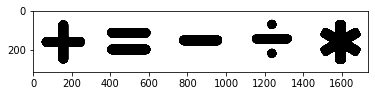

In [6]:
plt.imshow(operators_gray,cmap='gray')

In [7]:
operators_gray.shape

(316, 1736)

In [8]:
add = operators_gray[:,0:349]
equal = operators_gray[:,349:697]
minus = operators_gray[:,697:1045]
div = operators_gray[:,1045:1393]
mul = operators_gray[:,1393:1736]

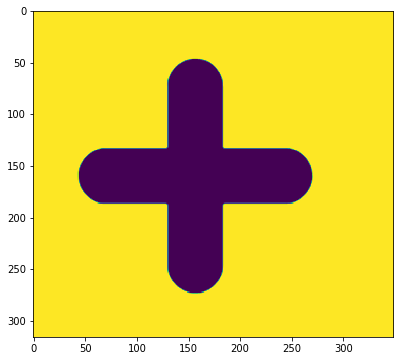

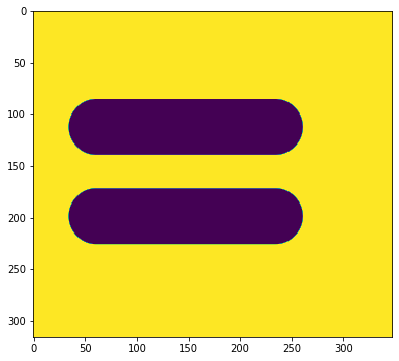

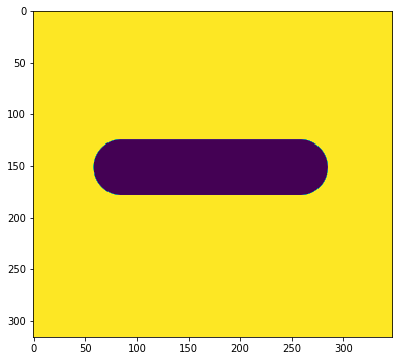

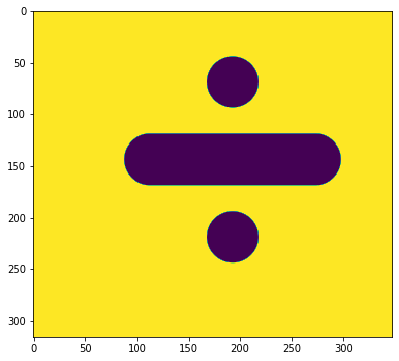

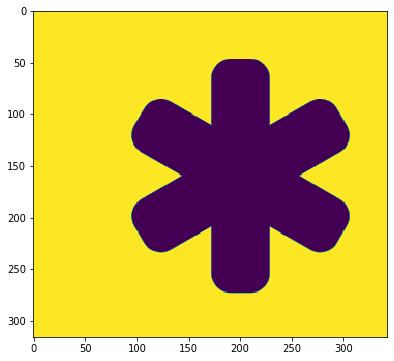

In [9]:
plt.figure(figsize=(8,6))
plt.imshow(add)
plt.figure(figsize=(8,6))
plt.imshow(equal)
plt.figure(figsize=(8,6))
plt.imshow(minus)
plt.figure(figsize=(8,6))
plt.imshow(div)
plt.figure(figsize=(8,6))
plt.imshow(mul)

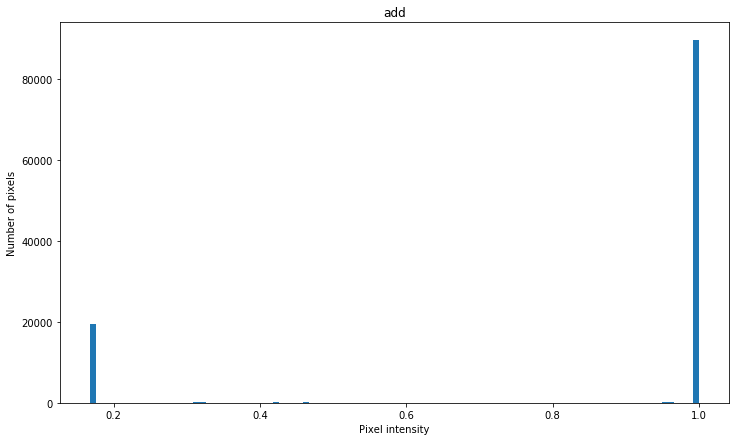

In [10]:
# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(add.ravel(), bins=100)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('add')

plt.show()

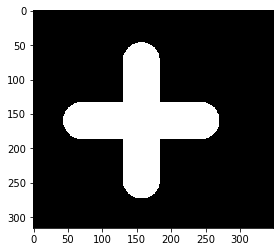

In [11]:
from skimage.filters import threshold_otsu,median
# Binarization based on Otsu threshold
add_thresh = threshold_otsu(add)
add_binarized = add < add_thresh

plt.imshow(add_binarized,cmap='gray')

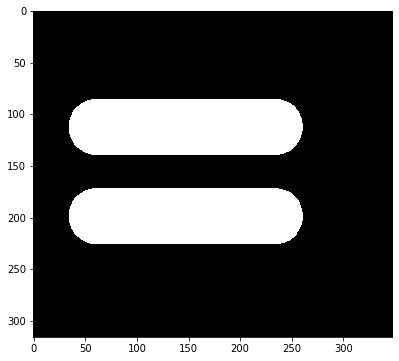

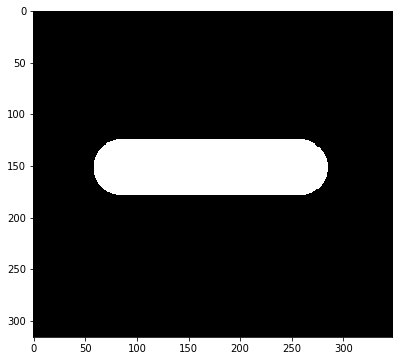

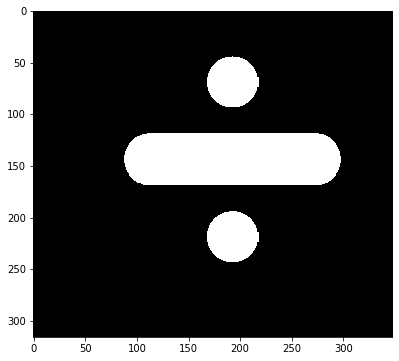

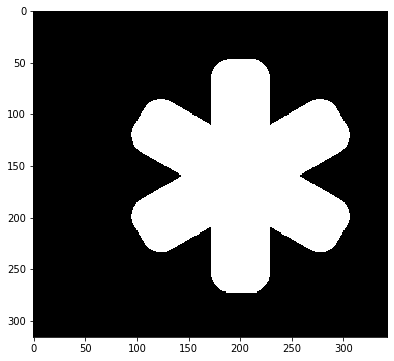

In [12]:
equal_thresh = threshold_otsu(equal)
equal_binarized = equal < equal_thresh
plt.figure(figsize=(8,6))
plt.imshow(equal_binarized,cmap='gray')

minus_thresh = threshold_otsu(minus)
minus_binarized = minus < minus_thresh
plt.figure(figsize=(8,6))
plt.imshow(minus_binarized,cmap='gray')

div_thresh = threshold_otsu(div)
div_binarized = div < div_thresh
plt.figure(figsize=(8,6))
plt.imshow(div_binarized,cmap='gray')

mul_thresh = threshold_otsu(mul)
mul_binarized = mul < mul_thresh
plt.figure(figsize=(8,6))
plt.imshow(mul_binarized,cmap='gray')

(159.6070019723866, 156.490483234714)
(316, 349)
(155.5125010776791, 147.23402879558583)
(316, 348)
(151.50986813755063, 171.28940791174696)
(316, 348)
(143.69683421071608, 192.48287300786038)
(316, 348)
(159.5528908655491, 200.04406431748203)
(316, 343)


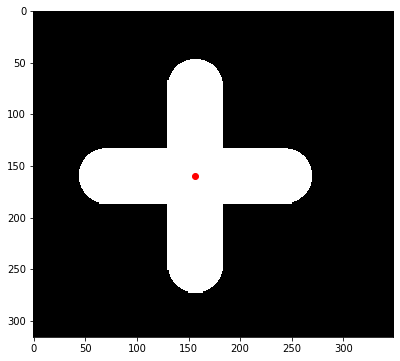

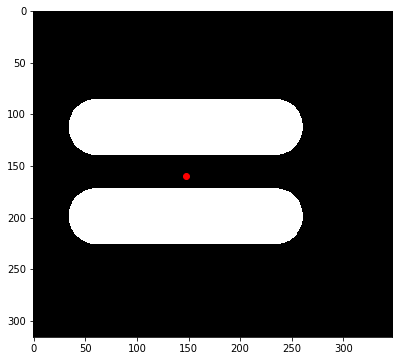

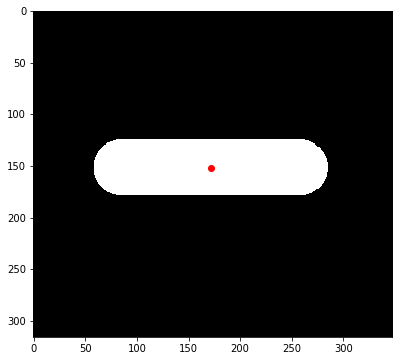

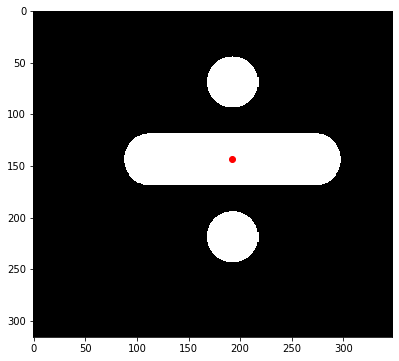

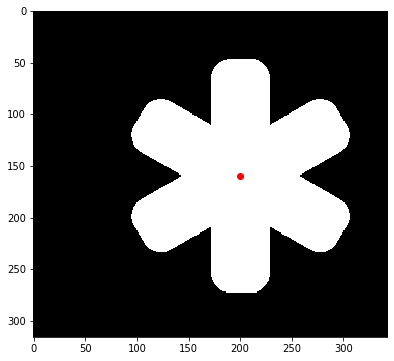

In [13]:
from skimage.measure import moments

M_add = moments(add_binarized)
centroid_add = (M_add[1, 0] / M_add[0, 0], M_add[0, 1] / M_add[0, 0])
print(centroid_add)
print(add_binarized.shape)

plt.figure(figsize=(8,6))
plt.imshow(add_binarized,cmap ='gray')
plt.plot(centroid_add[1], centroid_add[0], 'ro')

M_equal = moments(equal_binarized)
centroid_equal = (M_equal[1, 0] / M_equal[0, 0], M_equal[0, 1] / M_equal[0, 0])
print(centroid_equal)
print(equal_binarized.shape)

plt.figure(figsize=(8,6))
plt.imshow(equal_binarized,cmap ='gray')
plt.plot(centroid_equal[1], centroid_add[0], 'ro')

M_minus = moments(minus_binarized)
centroid_minus = (M_minus[1, 0] / M_minus[0, 0], M_minus[0, 1] / M_minus[0, 0])
print(centroid_minus)
print(minus_binarized.shape)

plt.figure(figsize=(8,6))
plt.imshow(minus_binarized,cmap ='gray')
plt.plot(centroid_minus[1], centroid_minus[0], 'ro')

M_div = moments(div_binarized)
centroid_div = (M_div[1, 0] / M_div[0, 0], M_div[0, 1] / M_div[0, 0])
print(centroid_div)
print(div_binarized.shape)

plt.figure(figsize=(8,6))
plt.imshow(div_binarized,cmap ='gray')
plt.plot(centroid_div[1], centroid_div[0], 'ro')

M_mul = moments(mul_binarized)
centroid_mul = (M_mul[1, 0] / M_mul[0, 0], M_mul[0, 1] / M_mul[0, 0])
print(centroid_mul)
print(mul_binarized.shape)

plt.figure(figsize=(8,6))
plt.imshow(mul_binarized,cmap ='gray')
plt.plot(centroid_mul[1], centroid_mul[0], 'ro')


(157.6070019723866, 174.490483234714)
(316, 349)


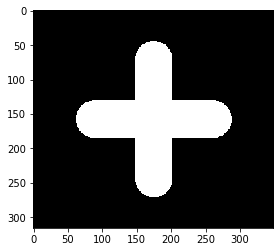

In [14]:
from skimage.transform import warp,AffineTransform
tadd = AffineTransform(translation=(-18, 2))
add_centered = warp(add_binarized,tadd)
plt.imshow(add_centered,cmap='gray')

M = moments(add_centered)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
print(centroid)
print(add_centered.shape)

(157.5125010776791, 174.23402879558583)
(316, 349)


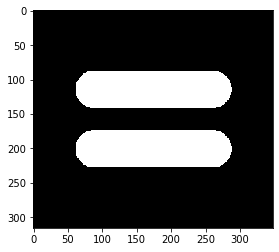

In [15]:
tequal = AffineTransform(translation=(-27, -2))
equal_centered = warp(equal_binarized,tequal)
plt.imshow(equal_centered,cmap='gray')

M = moments(equal_centered)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
print(centroid)
print(add_centered.shape)

(158.50986813755063, 174.28940791174696)
(316, 348)


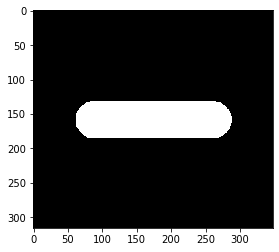

In [16]:
tminus = AffineTransform(translation=(-3, -7))
minus_centered = warp(minus_binarized,tminus)
plt.imshow(minus_centered,cmap='gray')

M = moments(minus_centered)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
print(centroid)
print(minus_centered.shape)

(158.69683421071608, 174.48287300786038)
(316, 348)


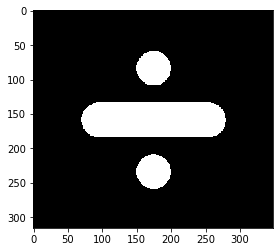

In [17]:
tdiv = AffineTransform(translation=(18, -15))
div_centered = warp(div_binarized,tdiv)
plt.imshow(div_centered,cmap='gray')

M = moments(div_centered)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
print(centroid)
print(div_centered.shape)

(158.5528908655491, 174.04406431748203)
(316, 343)


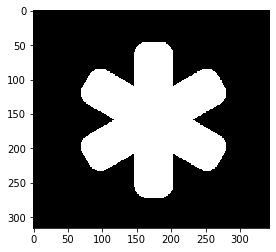

In [18]:
tmul = AffineTransform(translation=(26, 1))
mul_centered = warp(mul_binarized,tmul)
plt.imshow(mul_centered,cmap='gray')

M = moments(mul_centered)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
print(centroid)
print(mul_centered.shape)

In [ ]:
from skimage.transform import rotate

def generate_sign_dataset(sign_img, nb):
    
    gray_signs = [skimage.color.rgb2gray(im) for im in sign_img]
    
    dataset = []
    labels = []
    for k in range(nb):
        ind = np.random.randint(len(gray_signs))
        dataset.append(rotate(gray_signs[ind], np.random.randint(360), cval=1))
        labels.append(ind)
    return np.array(dataset), np.array(labels)
                              
dataset_sign, labels = generate_sign_dataset(sign_img, 125)
print(dataset_sign[0].shape)

In [19]:
from skimage.transform import resize

add_resized = resize(add_centered,(40,40), anti_aliasing = True)
equal_resized = resize(equal_centered,(40,40), anti_aliasing = True)
minus_resized = resize(minus_centered,(40,40), anti_aliasing = True)
div_resized = resize(div_centered,(40,40), anti_aliasing = True)
mul_resized = resize(mul_centered,(40,40), anti_aliasing = True)


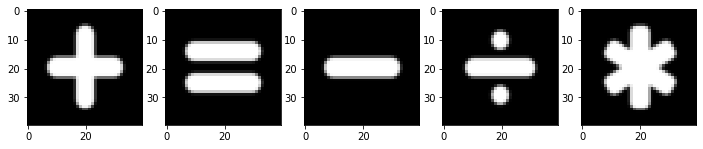

In [20]:
plt.figure(figsize=(12,7))
plt.subplot(151)
plt.imshow(add_resized,cmap = 'gray')
plt.subplot(152)
plt.imshow(equal_resized,cmap = 'gray')
plt.subplot(153)
plt.imshow(minus_resized,cmap = 'gray')
plt.subplot(154)
plt.imshow(div_resized,cmap = 'gray')
plt.subplot(155)
plt.imshow(mul_resized,cmap = 'gray')

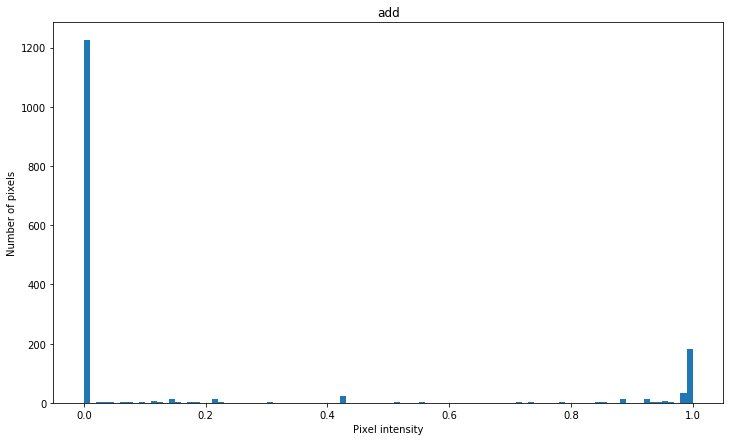

In [21]:
# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(add_resized.ravel(), bins=100)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('add')

plt.show()

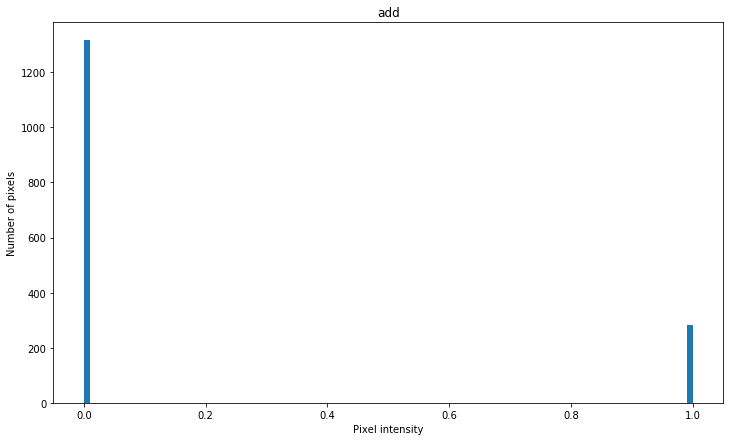

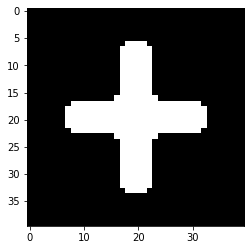

In [22]:
add_thresh = threshold_otsu(add_resized)
add_resized_binarized = add_resized>add_thresh

add_resized_binarized = add_resized_binarized.astype(float)
# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(add_resized_binarized.ravel(), bins=100)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('add')

plt.show()

plt.imshow(add_resized_binarized,cmap='gray')

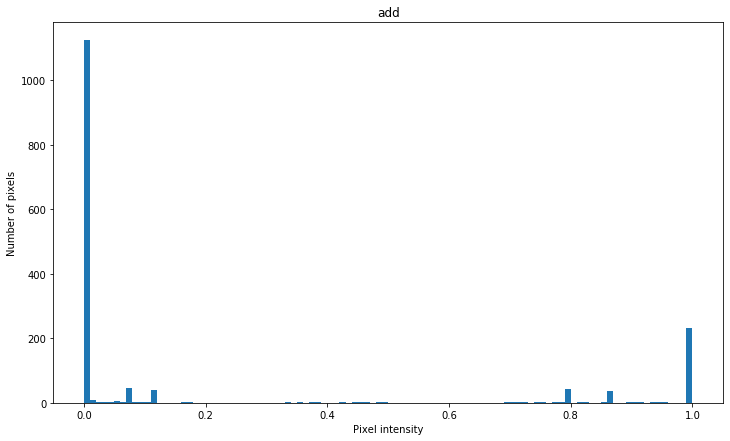

In [23]:
# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(equal_resized.ravel(), bins=100)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('add')

plt.show()

In [24]:
# equal
equal_thresh = threshold_otsu(equal_resized)
equal_resized_binarized = equal_resized>equal_thresh
equal_resized_binarized = equal_resized_binarized.astype(float)
# minus
minus_thresh = threshold_otsu(minus_resized)
minus_resized_binarized = minus_resized>minus_thresh
minus_resized_binarized = minus_resized_binarized.astype(float)
# div
div_thresh = threshold_otsu(div_resized)
div_resized_binarized = div_resized>div_thresh
div_resized_binarized = div_resized_binarized.astype(float)
# mul
mul_thresh = threshold_otsu(mul_resized)
mul_resized_binarized = mul_resized>mul_thresh
mul_resized_binarized = mul_resized_binarized.astype(float)

In [25]:
plt.figure(figsize=(12,7))
plt.subplot(151)
plt.imshow(add_resized_binarized,cmap = 'gray')
plt.subplot(152)
plt.imshow(equal_resized_binarized,cmap = 'gray')
plt.subplot(153)
plt.imshow(minus_resized_binarized,cmap = 'gray')
plt.subplot(154)
plt.imshow(div_resized_binarized,cmap = 'gray')
plt.subplot(155)
plt.imshow(mul_resized_binarized,cmap = 'gray')

In [26]:
from skimage.io import imsave

imsave('./operators/mul.png', mul_resized)
imsave('./operators/plus.png', add_resized)
imsave('./operators/equal.png', equal_resized)
imsave('./operators/minus.png', minus_resized)
imsave('./operators/div.png', div_resized)
imsave('./operators/mul_bin.png', mul_resized_binarized)
imsave('./operators/plus_bin.png', add_resized_binarized)
imsave('./operators/equal_bin.png', equal_resized_binarized)
imsave('./operators/minus_bin.png', minus_resized_binarized)
imsave('./operators/div_bin.png', div_resized_binarized)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0